# Pleiades H-R Diagram and Rotation

Figure 1.14 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Two-panel plot of the Pleiades star cluster, left is an H-R diagram from Gaia EDR3, Heyl et al. 2022 [ApJ, 926, 132](https://ui.adsabs.harvard.edu/abs/2022ApJ...926..132H), right is a plot of
the rotation period as a function of color (proxy for temperature) from Godoy-Rivera et al. 2021
[ApJ, 257, 46](https://ui.adsabs.harvard.edu/abs/2021ApJS..257...46G).

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. 

In [2]:
plotFile = 'Fig1_14.png' 

# graphic aspect ratio = width/height

aspect = 1.8

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Gaia EDR3 H-R Diagram 

Gaia EDR3 data for the Pleiades from Heyl et al. 2022.  Data is for 1044 stars

In [3]:
dataFile = 'Pleiades_Gaia_EDR3.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
colorHR = np.array(data['BP-RP'])
MG = np.array(data['MG'])

## Pleiades Rotation Data

Data from Godoy-Rivera et al. 2021 from the author, reduced to 3 columns:
 * Period in days
 * GaiaDR2 ID
 * BP-RP Color

Data for 610 stars.

In [4]:
dataFile = 'Pleiades_Prot_Godoy.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
colorRot = np.array(data['BP-RP'])
Prot = np.array(data['Period'])

### Figure 1.14

Two-panel, side-by-side plot of the Pleiades data
 * Left: H-R diagram M_G vs BP-RP color
 * Right: Rotation diagram P_rot vs BP-RP color

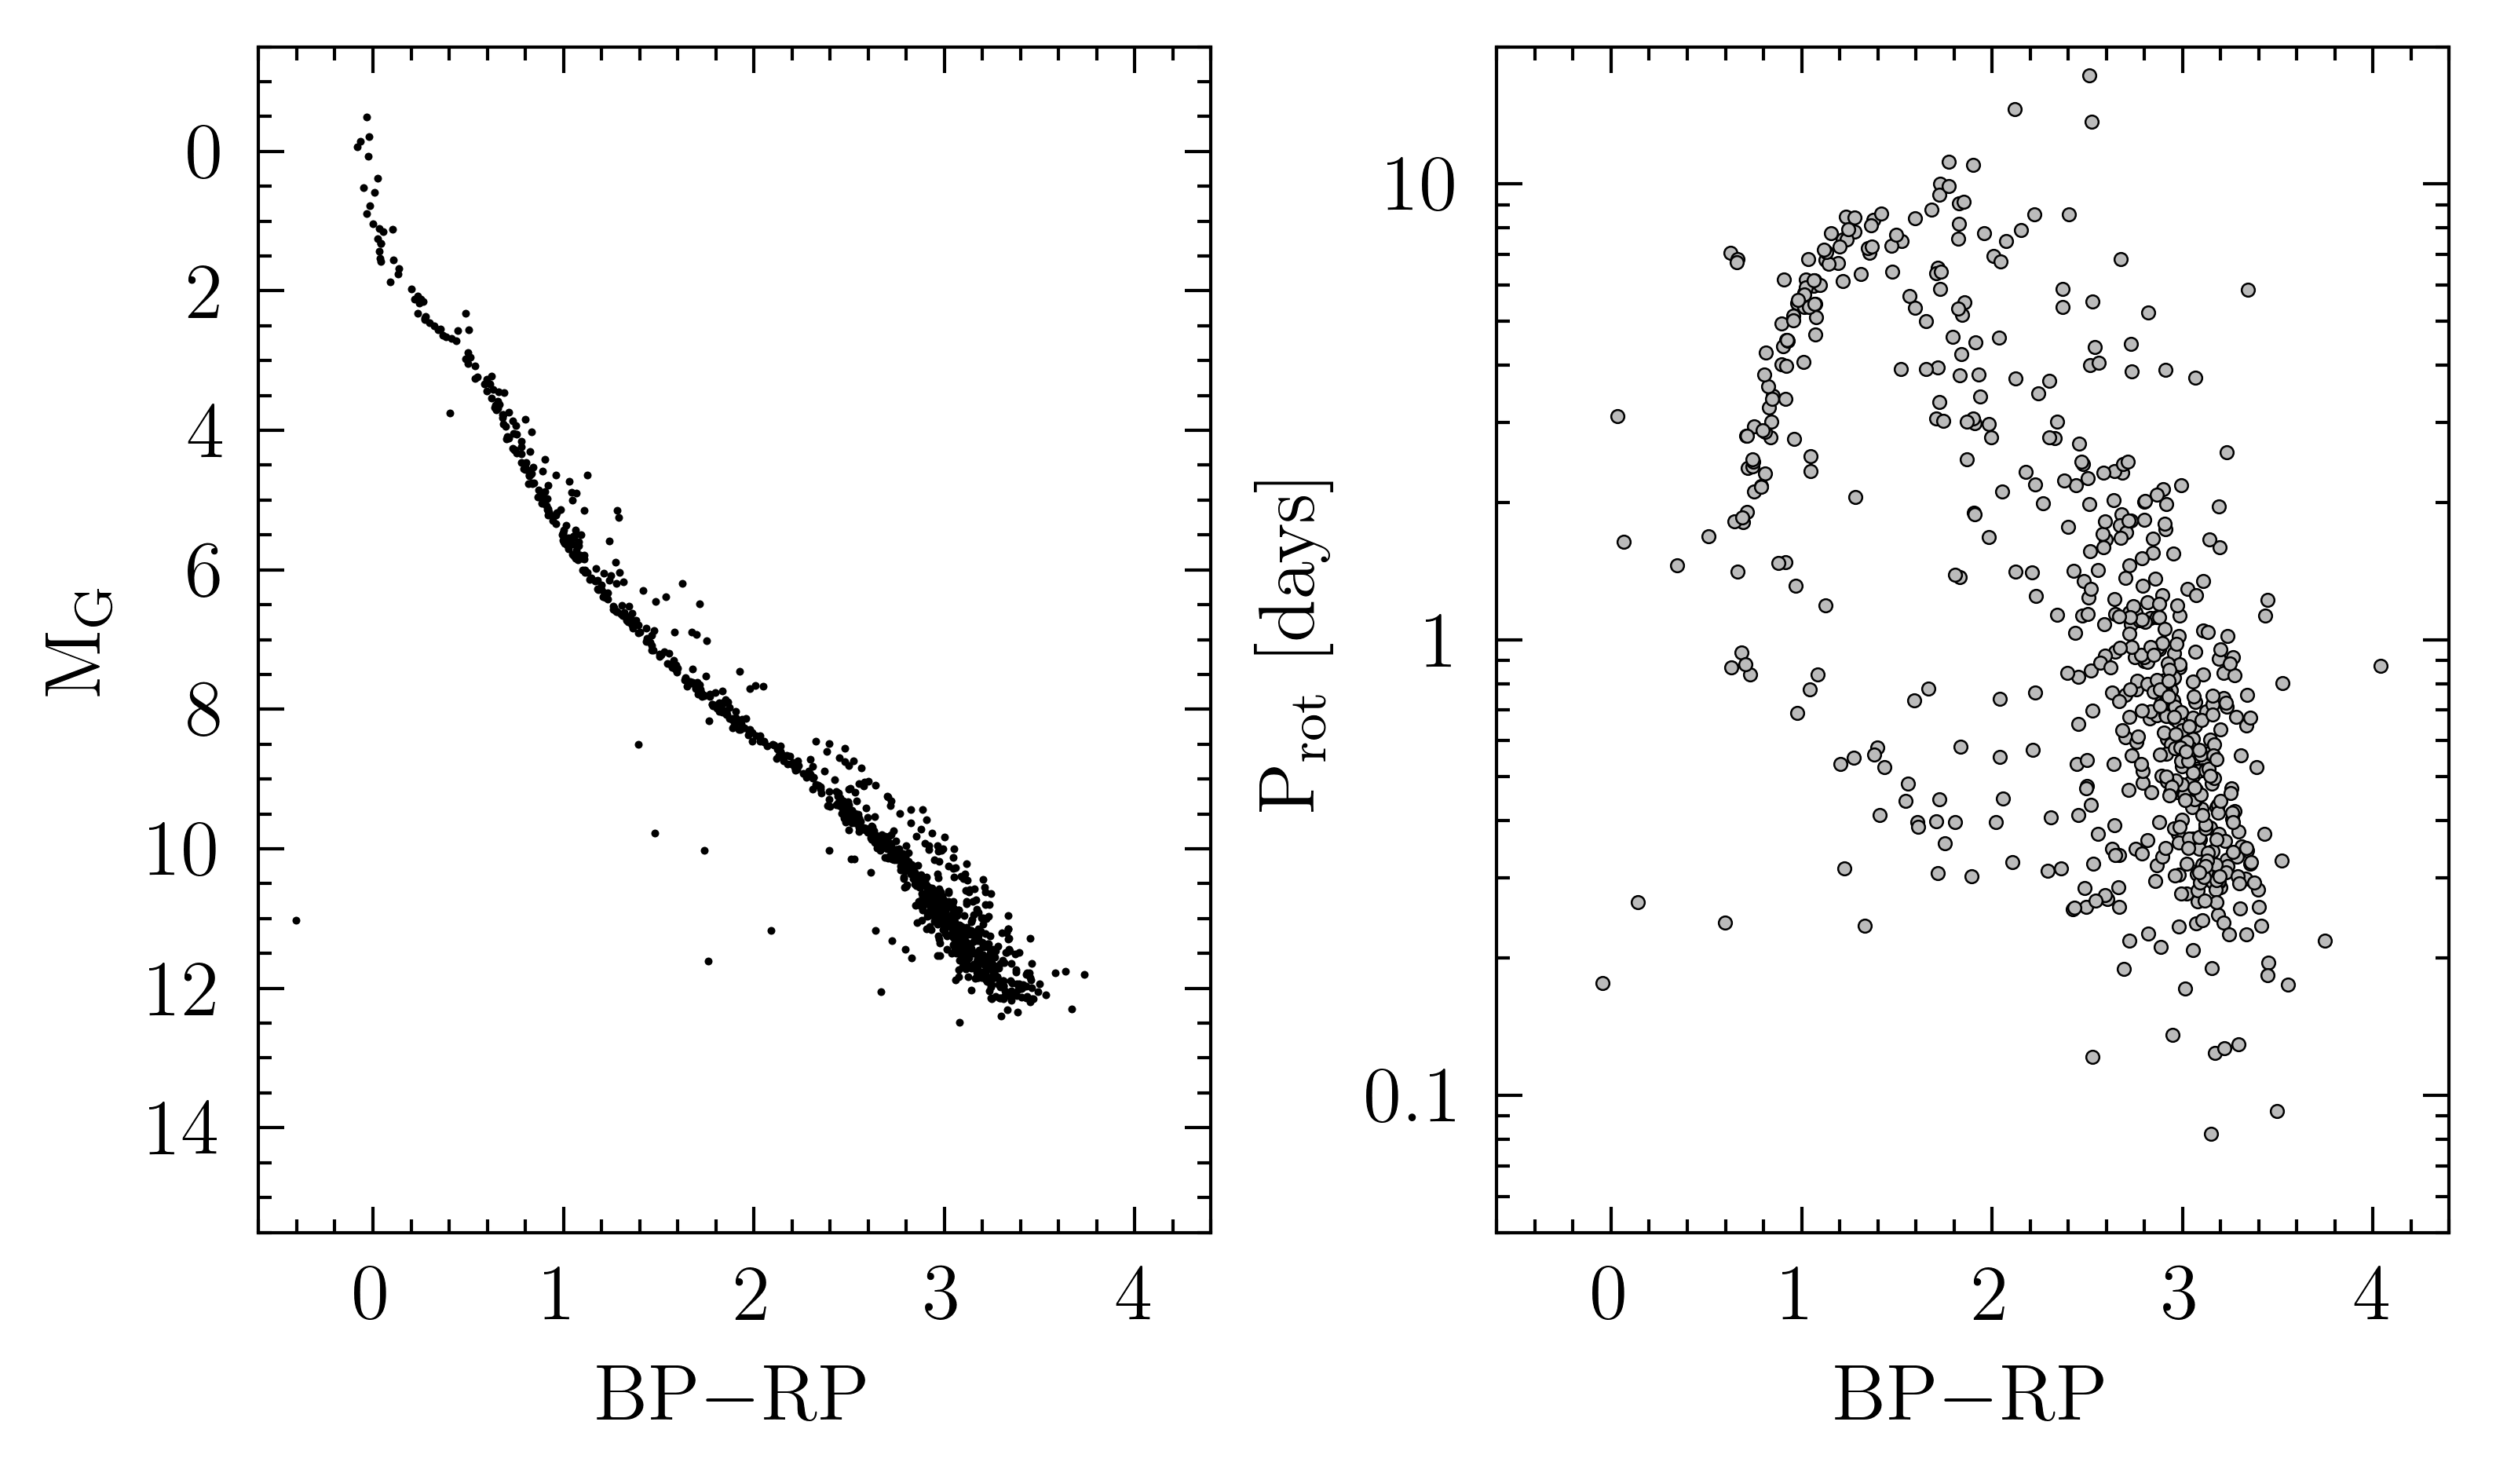

In [5]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)

fig.subplots_adjust(wspace=0.3, hspace=0)

# Left panel

ax1.set_xlim(-0.6,4.4)
ax1.set_ylim(15.5,-1.5)
ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.xaxis.set_major_locator(MultipleLocator(1.0))
ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.yaxis.set_major_locator(MultipleLocator(2.0))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_xlabel(r'BP$-$RP', fontsize=axisFontSize)
ax1.set_ylabel(r'M$_{\rm G}$',fontsize=axisFontSize)

ax1.plot(colorHR,MG,'o',color='black',ms=1.2,mew=0,alpha=1,zorder=10)

# Right Panel

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(-0.6,4.4)
ax2.set_ylim(0.05,20)
ax2.set_yscale('log')
ax2.xaxis.set_major_locator(MultipleLocator(1.0))
ax2.xaxis.set_minor_locator(MultipleLocator(0.2))
ax2.set_yticks([0.1,1,10])
ax2.set_yticklabels(['0.1','1','10'])
ax2.set_xlabel(r'BP$-$RP', fontsize=axisFontSize)
ax2.set_ylabel(r'P$_{\rm rot}$ [days]', fontsize=axisFontSize)

ax2.plot(colorRot,Prot,'o',mec='black',mfc='#bbbbbb',ms=2,mew=0.3,alpha=1,zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')